# 기초 통계 및 연습하기

## P1. 수영교실
- 평균값, 중앙값, 최빈값에 대한 이해

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# 수영교실에 참석하고 있는 사람들의 나이를 나타낸 것
swim = [1,1,1,2,2,2,2,3,3,31,31,32,32,32,32,33,33,33]
swim = pd.DataFrame(swim)
swim.columns = ['age']

1. 평균, 중앙값을 계산해보세요.

In [ ]:
# 평균값
swim.mean()

age    17.0
dtype: float64

In [ ]:
# 중앙값
swim.median()

age    17.0
dtype: float64

2. 평균, 중앙값이 위의 데이터를 대표하는 값으로 적합한지 생각을 적어보세요.
> 데이터 값이 작은 값, 큰 값으로 크게 두 개의 분류로 나눠질 정도로 차이가 커서 평균이나 중앙값으로 대표값을 선정하는 것은 적합하지 않다고 생각합니다.

3. 최빈값을 구해보세요.

In [ ]:
# 최빈값
swim.mode()

,age
0,2
1,32


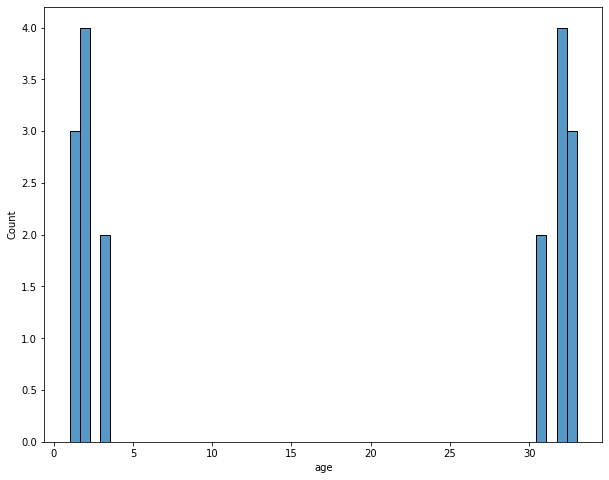

In [ ]:
# swim data의 분포도 확인
plt.figure(figsize=(10,8))
sns.histplot(data=swim, x=swim.age, bins=50 )
plt.show()

4. 최빈값이 위의 데이터를 대표하는 값으로 적합한지 생각을 적어보세요.
> 데이터가 크게 2개의 분류로 나눠지기 때문에 최빈값을 대표값으로 선정하는 것이 적합하다고 생각합니다.

5. 도수분포표를 그려보세요.

In [ ]:
swim = np.array(swim)

In [ ]:
freq, _ = np.histogram(swim, bins = 5, range=(0,50))
freq

array([9, 0, 0, 9, 0])

In [ ]:
# 0~10, 10~20 문자열 리스트 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 50, 10)]

# freq_class 인덱스로 DataFrame을 작성
freq_hist_df = pd.DataFrame({'frequency' : freq}, index = pd.Index(freq_class, name = 'class'))
freq_hist_df

,frequency
class,
0~10,9
10~20,0
20~30,0
30~40,9
40~50,0


In [ ]:
# 계급값
class_value = [(i+(i+10))//2 for i in range(0, 50, 10)]
class_value

[5, 15, 25, 35, 45]

In [ ]:
# 상대도수 : 데이터가 어느 정도의 비율을 차지하고 있는지
rel_freq = freq / freq.sum()
rel_freq

array([0.5, 0. , 0. , 0.5, 0. ])

In [ ]:
# 누적상대도수 : 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.5, 0.5, 0.5, 1. , 1. ])

In [ ]:
# 계급값과 상대도수와 누적상대도수를 도수분포표에 추가
freq_hist_df['class value'] = class_value
freq_hist_df['relative frequency'] = rel_freq
freq_hist_df['cumulative relative frequency'] = cum_rel_freq
freq_hist_df = freq_hist_df[['class value','frequency', 'relative frequency', 'cumulative relative frequency' ]]
freq_hist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,9,0.5,0.5
10~20,15,0,0.0,0.5
20~30,25,0,0.0,0.5
30~40,35,9,0.5,1.0
40~50,45,0,0.0,1.0


6. 히스토그램을 그려보세요.
> 히스토그램은 도수분포표를 막대그래프로 나타낸 것

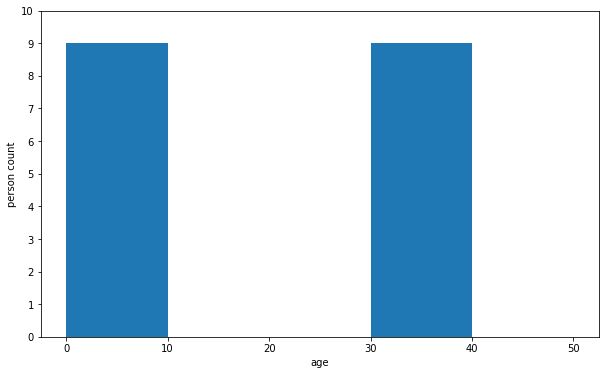

In [ ]:
# 히스토그램 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(swim, bins = 5, range=(0, 50))
ax.set_xlabel('age')
ax.set_ylabel('person count')
ax.set_xticks(np.linspace(0,50, 5+1))
ax.set_yticks(np.arange(0, freq_hist_df.frequency.values.max()+1+1))
plt.show()

7. 이 교실을 대표하는 나이를 2개 고른다면, 어떤 나이가 적합한지 생각을 적어보세요.
> 2, 32가 대표하는 나이입니다. <br>그 이유는 나이에 대한 도수분포표와 히스토그램을 해본 결과, 0\~10, 30\~40 계급에만 데이터가 있고, 나머지 계급에는 데이터가 없기 때문입니다. 2개의 계급의 최빈값이 각각 2, 32이기 때문에 2, 32가 대표하는 나이입니다.

## P2. 이 달의 판매 실적
- 분산과 표준편차에 대한 이해


1. 각 사원의 표준편차를 구해보세요.

In [ ]:
# 세 명의 사원의 이번달 물품 판매 실적이다.

a = [70, 90, 90, 100, 100, 100, 100, 110, 110, 130]
a = pd.DataFrame(a)

b = [70, 80, 90, 90, 100, 100, 110, 110, 120, 130]
b = pd.DataFrame(b)

c = [30, 30, 60, 70, 70, 100, 100, 100, 110, 130, 300]
c = pd.DataFrame(c)

In [ ]:
print(np.std(a))
print(np.std(b))
print(np.std(c))

0    14.832397
dtype: float64
0    17.320508
dtype: float64
0    70.194535
dtype: float64


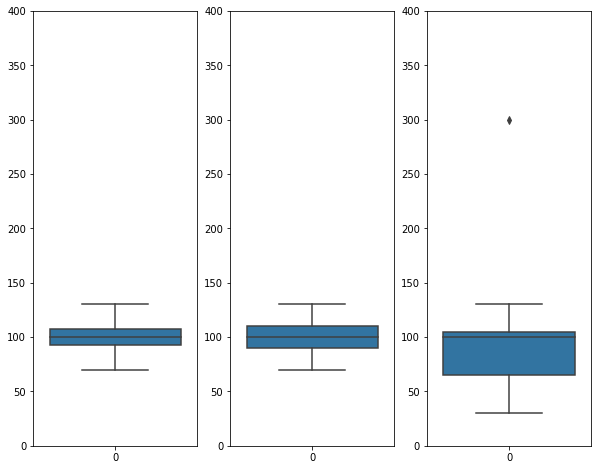

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
sns.boxplot(data=a)
plt.ylim(0,400)

plt.subplot(1,3,2)
sns.boxplot(data=b)
plt.ylim(0,400)

plt.subplot(1,3,3)
sns.boxplot(data=c)
plt.ylim(0,400)

plt.show()

2. 세 사원 중에 누가 가장 안정적인 판매 실력을 가지고 있나요?
> a 사원의 표준편차가 가장 낮으므로 a 사원의 판매 실력이 안정적이라고 할 수 있습니다.

## P3. 향수공장
- 모집단과 표본 추출 이해하기

In [ ]:
# 향수 공장에서 생산되는 향수를 무작위로 10개 추출하여 무게를 측정한 것이다.
perfume = [61.9, 62.6, 63.3, 64.8, 65.1, 66.4, 67.1, 67.2, 68.7, 69.9]
perfume = np.array(perfume)
perfume

array([61.9, 62.6, 63.3, 64.8, 65.1, 66.4, 67.1, 67.2, 68.7, 69.9])

1. 표본 집단의 평균을 계산해보세요.

In [ ]:
np.mean(perfume)

65.7

2. 계산한 표본 집단의 평균으로 모집단을 추청해도 되는지 생각을 적어보세요.
> 모집단에서 표본 집단을 10개로 1번 무작위 추출한 걸 가지고 표본 평균 낸 것을 바로 모평균이라고 추청하면 안된다고 생각한다.<br> 적어도 여러번 무작위 추출 후 표본 평균들의 평균을 가지고 모평균이라고 추정해야한다고 생각한다.

3. 해당 표본이 특정 작업장에서만 나온 것이라고 가정하면 어떤 문제가 생기는지 적어보세요.
> 표본집단을 만들 때, 여러 작업장에서 무작위 추출을 하여 표본집단을 분석한 것을 토대로 모집단의 모수들을 추정해야 하는데, 특정 작업장에서만 나온 것을 분석하면 모집단의 모수를 추정할 수는 없다.

4. 모집단의 크기가 10,000개라고 할 때 표본의 크기가 적절한지에 대해 생각을 적어보세요.
> 표본의 크기가 너무 작은 경우가 아니라면 여러 번 무작위 추출을 하면 상관없다고 생각한다. 

## P4. 야외콘서트
- 이변량 데이터와 상관관계 파악하기

In [ ]:
# 야외 콘서트가 열렸을 때마다 일조량과 관객 수를 조사하여 나타낸 것이다.
x = [1.9, 2.5, 3.2, 3.8, 4.7, 5.5, 5.9, 7.2] # 일조량 (시간)
y = [22, 33, 30, 42, 38, 49, 42, 55] # 공연 관객 수 (100명)
x = np.array(x)
y = np.array(y)

1. 상관계수를 계산해보세요.

In [ ]:
# 공분산을 먼저 구해보자
mean_x = np.mean(x)
mean_y = np.mean(y)

In [ ]:
np.sum((x - mean_x) * (y - mean_y)) / len(x)

15.3546875

In [ ]:
np.cov(x,y,ddof=0)

array([[ 2.87734375, 15.3546875 ],
       [15.3546875 , 97.609375  ]])

In [ ]:
# 상관계수를 구해보자.

(np.sum((x - mean_x) * (y - mean_y)) / len(x)) / (np.std(x, ddof=0) * np.std(y, ddof=0))

0.9162191008669328

In [ ]:
np.cov(x,y, ddof=0)[0][1] / (np.std(x, ddof=0) * np.std(y, ddof=0))

0.9162191008669327

In [ ]:
np.corrcoef(x,y)[0][1]

0.9162191008669328

2. 일조량(x)와 공연 관객 수(y)는 어떤 상관관계를 가지는지 생각을 적어주세요.
> 상관계수가 약 0.92로 나온 것을 보아 일조량과 공연 관객 수는 양의 상관관계에 있다고 말할 수 있다.